In [2]:
# Bank Transactions 
# This dataset simulates transactional activities from a digital banking platform. It includes detailed information for 
# each transaction such as amount, location, customerAge, Login Attempts, etc.

# File : bank_transactions_data_2.csv
# shape : 

# Goal of this project is to build a machine learning model to detect fraudulent transactions by analyzing several 
# underlying factors like transactions, demographics and user-behaviour.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import logging
import os
log = logging.getLogger('Exploratory_Data_Analysis')
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s : %(message)s', datefmt='%H:%M:%S')

In [4]:
def load_data(filename: str = '../data/bank_transactions_data_2.csv'):
    try:
        if os.path.exists(filename):
            df = pd.read_csv(filename)
            log.info('Data has successfully been loaded')
        else:
            log.error('File Not Found')
        return df
    except FileNotFoundError as e:
        log.exception('File Not Found: ',e)
        return None

In [5]:
# ---Decriptive Summary of the dataset----
def descriptive_overview(df: pd.DataFrame):
    if df is not None:
        log.info(f'Number of observations {df.shape[0]}')
        log.info(f'Number of features : {df.shape[1]}\n')
        display(df.describe(include='all').T)
        return df.describe(include='all').T
    else:
        log.warning('DataFrame is empty!')

In [6]:
# ---Analysis of the numerical columns---
def numeric_cols_summary(df: pd.DataFrame):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    log.info(f'| Number of numeric columns : {len(numeric_cols)} | Examples : {numeric_cols[:3]}\n')
    for i,col in enumerate(numeric_cols,1):
        log.info(f'{i} {col:<24} | Min : {df[col].min():<15} | Max : {df[col].max():<10}\n')
    return numeric_cols

In [7]:
# ----Analysis of the categorical columns-----
def category_cols_summary(df: pd.DataFrame):
    category_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    log.info(f'| Number of categorical columns : {len(category_cols)} | Examples : {category_cols[:3]}\n')
    for i,col in enumerate(category_cols,1):
        uniques = df[col].unique()
        log.info(f'{i:<2}. {col:<25} |Unique : {df[col].nunique():<7} | Examples : {uniques[:3]}\n')
    return category_cols

In [8]:
# --------check for duplicates------
def duplicate_data(df: pd.DataFrame):
    duplicates = df[df.duplicated()]
    log.info(f'Number of duplicates : {len(duplicates)}\n')
    if len(duplicates) == 0:
        log.info(f'No duplicates found in the data\n')
    else:
        display(duplicates)
        return duplicates

In [9]:
# -----check for missing values-----
def missing_data(df: pd.DataFrame):
    missing_d = df.isnull().sum()
    missing_d = missing_d[missing_d > 0].sort_values(ascending=False)
    missing_pct = (missing_d / len(df)) * 100
    missing_data_df = pd.DataFrame({
        'missing_data' : missing_d,
        'missing_pct' : missing_pct.round(2)
    })
    display(missing_data_df)
    return missing_data_df

In [10]:
# ---check for outliers----
def check_outliers(df: pd.DataFrame, col: str):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [11]:
def outlier_summary(df: pd.DataFrame, numeric_col: list[str]):
    for i, col in enumerate(numeric_col):
        outlier, lower, upper = check_outliers(df, col)
        log.info(f'{i}. {col:<20} | Number of outliers : {len(outlier):<4} | Range : ({lower} - {upper})')

In [12]:
def run_eda(filename: str = '../data/bank_transactions_data_2.csv'):
    df = load_data()
    overview = descriptive_overview(df)
    num_cols = numeric_cols_summary(df)
    cat_cols = category_cols_summary(df)
    duplicates = duplicate_data(df)
    missing_data_ = missing_data(df)
    outliers = outlier_summary(df, num_cols)

    return {
        'data' : df,
        'overview' : overview,
        'num_cols' : num_cols,
        'cat_cols' : cat_cols,
        'duplicate' : duplicates,
        'missing' : missing_data_,
        'outlier' : outliers
    }
if __name__ == '__main__':
    results = run_eda()
    df = results['data']

18:59:42 - INFO : Data has successfully been loaded
18:59:42 - INFO : Number of observations 2512
18:59:42 - INFO : Number of features : 16



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,2512,2512,TX000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountID,2512,495,AC00460,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionAmount,2512.0,NaN,NaN,NaN,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11
TransactionDate,2512,2512,2023-04-11 16:29:14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionType,2512,2,Debit,1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2512,43,Fort Worth,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceID,2512,681,D000548,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IP Address,2512,592,200.136.146.93,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MerchantID,2512,100,M026,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,2512,3,Branch,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


18:59:42 - INFO : | Number of numeric columns : 5 | Examples : ['TransactionAmount', 'CustomerAge', 'TransactionDuration']

18:59:42 - INFO : 1 TransactionAmount        | Min : 0.26            | Max : 1919.11   

18:59:42 - INFO : 2 CustomerAge              | Min : 18              | Max : 80        

18:59:42 - INFO : 3 TransactionDuration      | Min : 10              | Max : 300       

18:59:42 - INFO : 4 LoginAttempts            | Min : 1               | Max : 5         

18:59:42 - INFO : 5 AccountBalance           | Min : 101.25          | Max : 14977.99  

18:59:42 - INFO : | Number of categorical columns : 11 | Examples : ['TransactionID', 'AccountID', 'TransactionDate']

18:59:42 - INFO : 1 . TransactionID             |Unique : 2512    | Examples : ['TX000001' 'TX000002' 'TX000003']

18:59:42 - INFO : 2 . AccountID                 |Unique : 495     | Examples : ['AC00128' 'AC00455' 'AC00019']

18:59:42 - INFO : 3 . TransactionDate           |Unique : 2512    | Examples : ['2023

,missing_data,missing_pct


18:59:42 - INFO : 0. TransactionAmount    | Number of outliers : 113  | Range : (-417.07875000000007 - 913.49125)
18:59:42 - INFO : 1. CustomerAge          | Number of outliers : 0    | Range : (-21.0 - 107.0)
18:59:42 - INFO : 2. TransactionDuration  | Number of outliers : 0    | Range : (-84.0 - 308.0)
18:59:42 - INFO : 3. LoginAttempts        | Number of outliers : 122  | Range : (1.0 - 1.0)
18:59:42 - INFO : 4. AccountBalance       | Number of outliers : 0    | Range : (-7757.304999999999 - 16940.495)


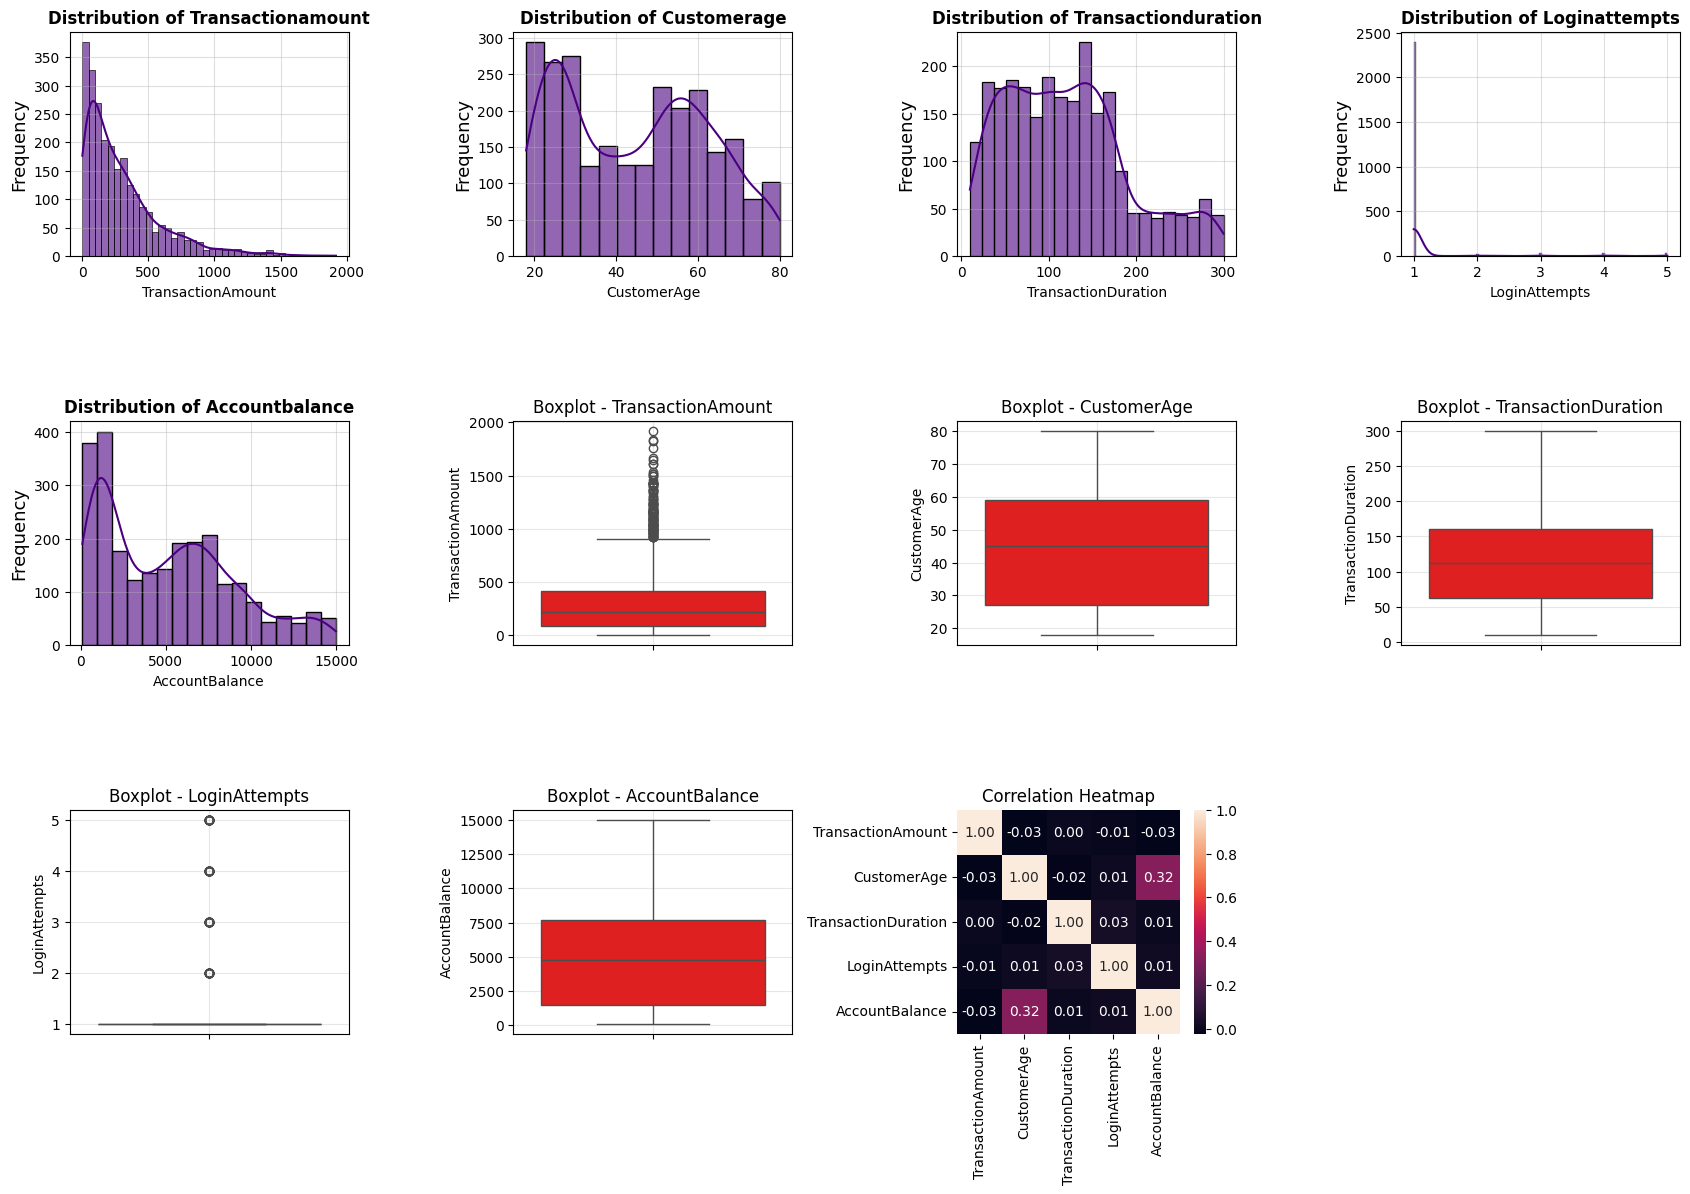

In [ ]:
# ---univariate analysis------
def advanced_visuals(df: pd.DataFrame, numeric_cols: list[str], category_cols: list[str]):
    plt.figure(figsize=(17,30))
    # distribution plots for numeric cols
    for i, col in enumerate(numeric_cols,1):
        plt.subplot(8, 4, i)
        sns.histplot(data=df,x=col,kde=True,color='indigo',alpha=0.6)
        plt.title(f'Distribution of {col.title()}',fontsize=12, fontweight='bold')
        plt.ylabel('Frequency',fontsize=13)
        plt.grid(True, alpha=0.4)

    # boxplots
    for i, col in enumerate(numeric_cols,6):
        plt.subplot(8, 4, i)
        sns.boxplot(data=df, y=col, color='red')
        plt.title(f'Boxplot - {col}')
        plt.grid(True, alpha=0.3)

    plt.subplot(8, 4, 11)
    corr = df.corr(numeric_only=True)
    sns.heatmap(data=corr, annot=True, fmt='.2f')
    plt.title('Correlation Heatmap')

    # bar plots for categoricsl columns
    # for  i, col in enumerate(category_cols,11):
    #     plt.subplot(8, 4, i)
    #     plot_df = pd.DataFrame({
    #         'col' : col,
    #         'value' : df[col].value_counts()
    #     })
    #     sns.barplot(data=plot_df, x='col', y='value', color='green')
    #     plt.title(f'Barplot - {col}',fontsize=12, fontweight='bold')
    #     plt.ylabel('Frequency',fontsize=12)
    #     plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
univariate_visuals(df, num_cols, cat_cols)